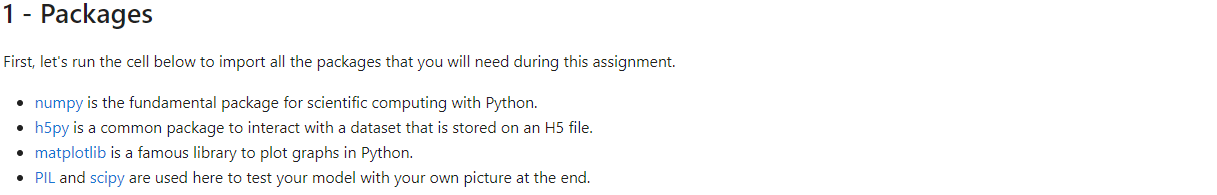

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

lr_utils.py代码如下，你也可以自行打开它查看：

In [2]:
import numpy as np
import h5py
    
    
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

解释以下上面的load_dataset() 返回的值的含义：

    train_set_x_orig ：保存的是训练集里面的图像数据（本训练集有209张64x64的图像）。
    train_set_y_orig ：保存的是训练集的图像对应的分类值（【0 | 1】，0表示不是猫，1表示是猫）。
    test_set_x_orig ：保存的是测试集里面的图像数据（本训练集有50张64x64的图像）。
    test_set_y_orig ： 保存的是测试集的图像对应的分类值（【0 | 1】，0表示不是猫，1表示是猫）。
    classes ： 保存的是以bytes类型保存的两个字符串数据，数据为：[b’non-cat’ b’cat’]。

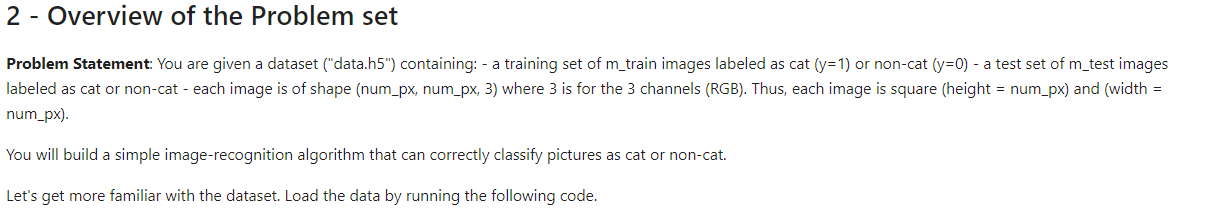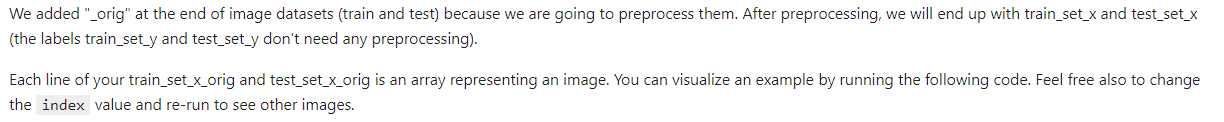

[b'non-cat' b'cat']
y = [1], it's a 'cat' picture.


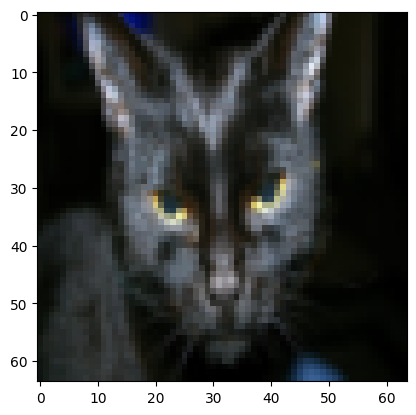

In [3]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print (classes)
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

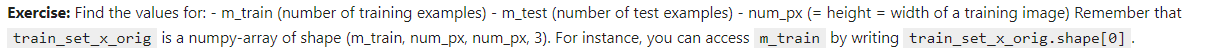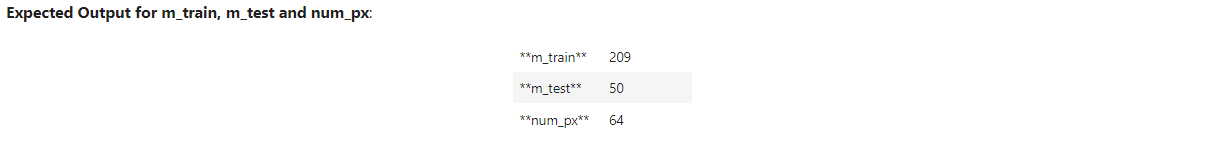

In [4]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


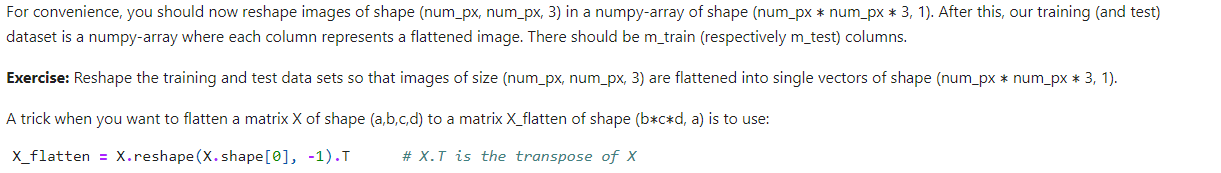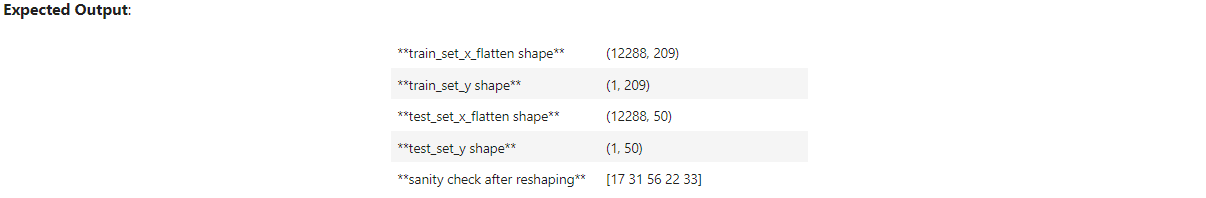

In [5]:
train_set_x_flatten = train_set_x_orig.reshape(m_train, -1).T
test_set_x_flatten = test_set_x_orig.reshape(m_test, -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


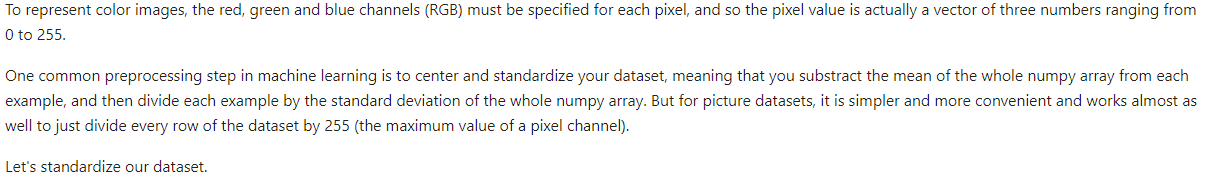
standardize：将数据按期属性（按列进行）减去其均值，并处以其方差。得到的结果是，对于每个属性/每列来说所有数据都聚集在0附近，方差为1。

对于图片数据集，它更简单，更方便，几乎可以将数据集的每一行除以255（像素通道的最大值），因为在RGB中不存在比255大的数据，所以我们可以放心的除以255，让标准化的数据位于[0,1]之间
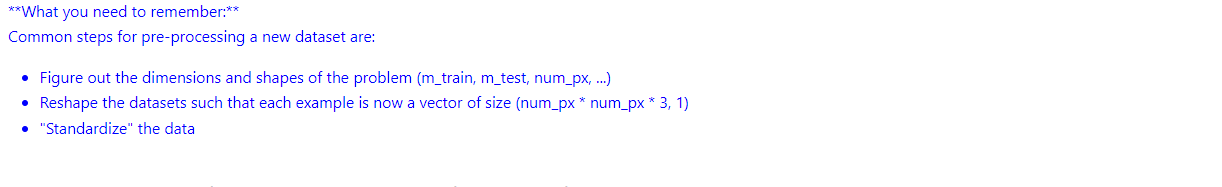

In [6]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

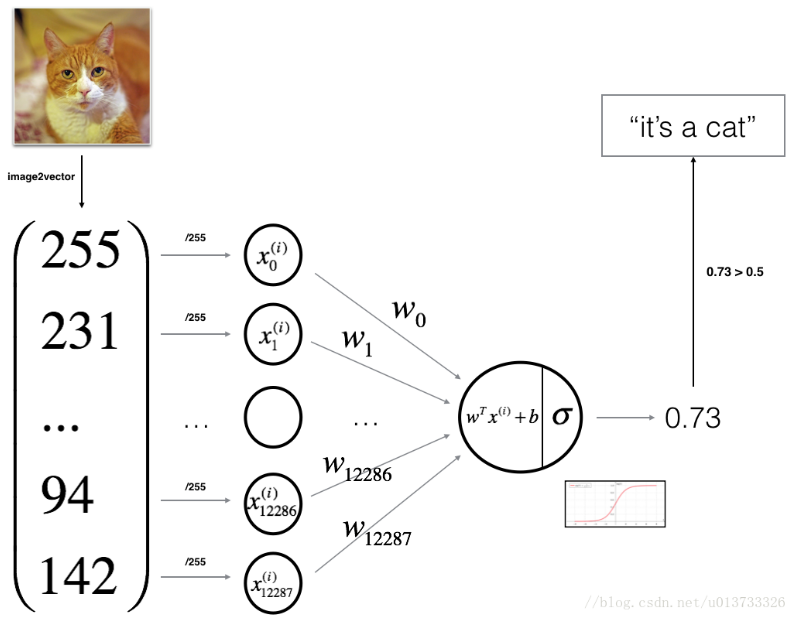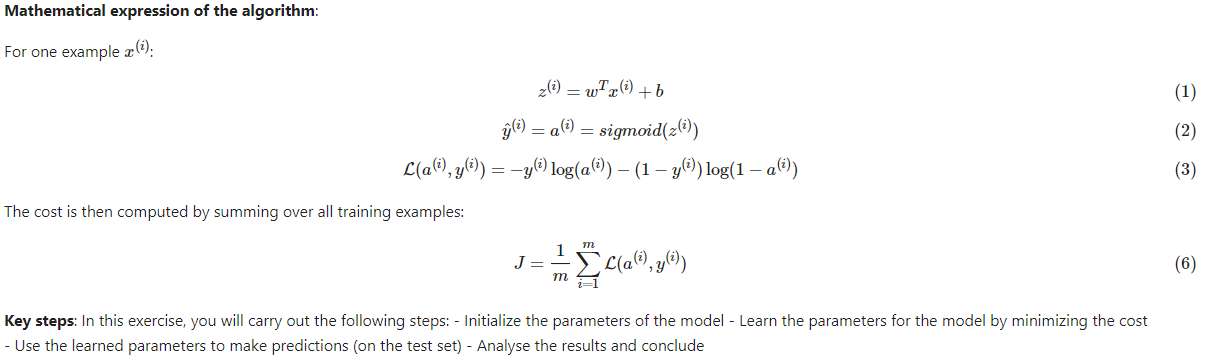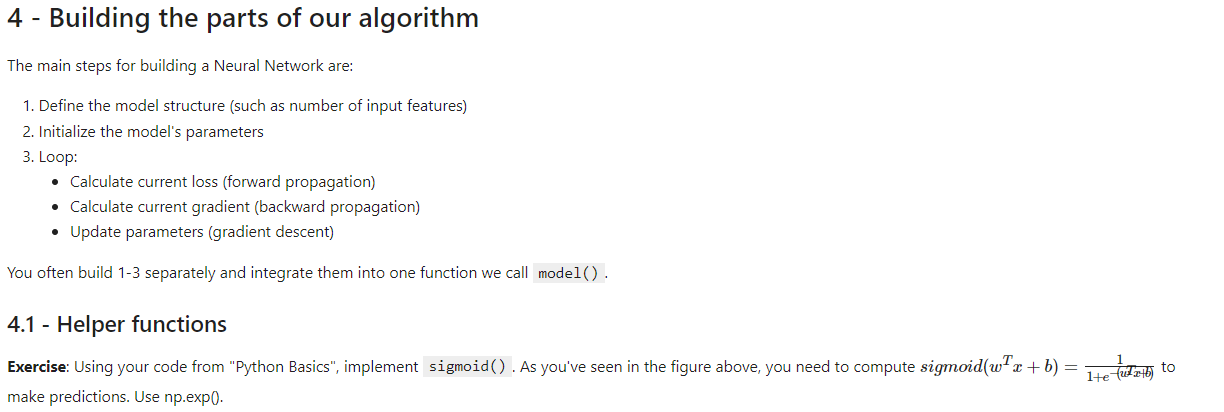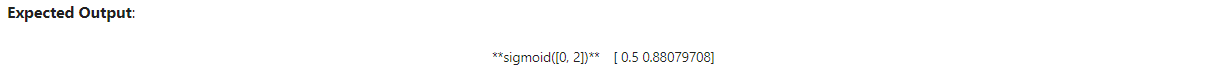

In [7]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

x = np.array([0, 2])
sigmoid(x)

array([0.5       , 0.88079708])

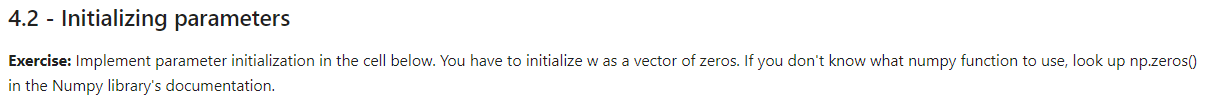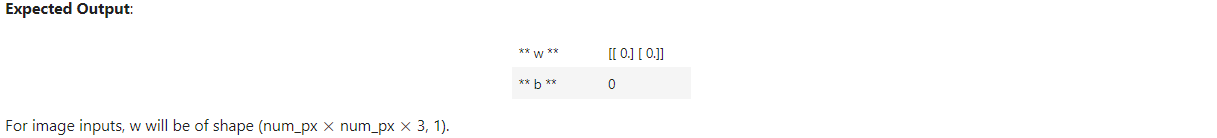

In [8]:
w = np.zeros([2, 1])
b = 0
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


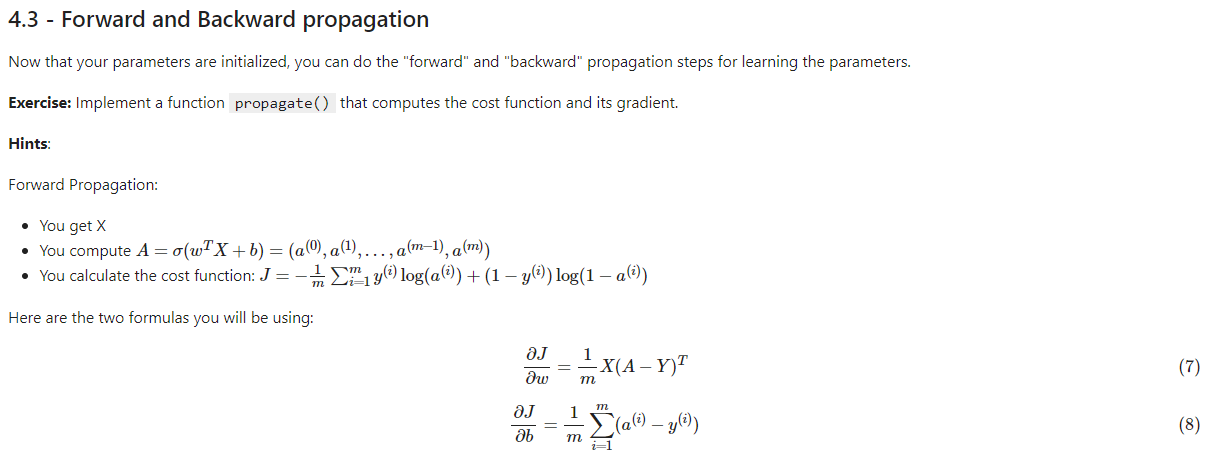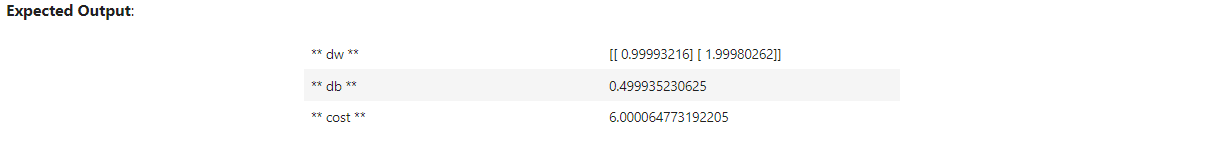

In [9]:
def propagate(w, b, X, Y):
    m = Y.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = - (np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))) / m
    dw = np.dot(X , (A - Y).T) / m
    db = np.sum(A - Y) / m
    
    ## END CODE HERE ###
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)  # 去掉shape中为1的维度
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost


w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


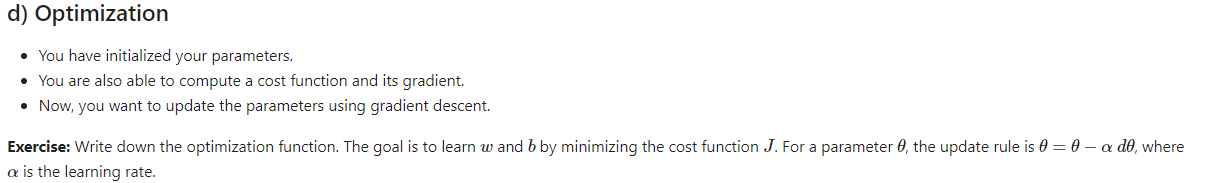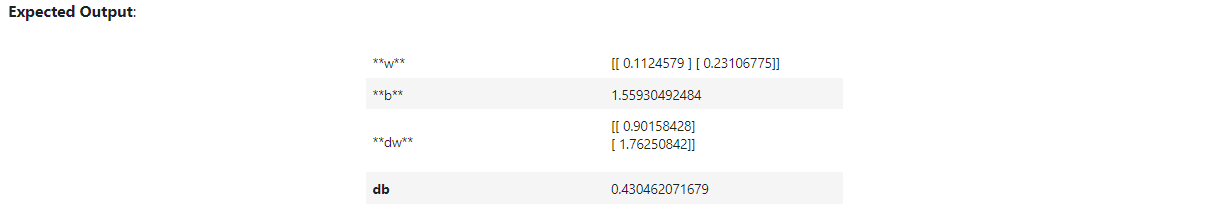

In [14]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        w = w - learning_rate * grads["dw"]
        b = b - learning_rate * grads["db"]
        if i % 100 == 0:w
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w, "b": b}
    grads = {"dw": grads["dw"], "db": grads["db"]}
    return params, grads, costs

w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
params, grads, costs = optimize(w, b, X, Y, num_iterations= 1000, learning_rate = 0.01, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print(costs)

Cost after iteration 0: 6.000065
Cost after iteration 100: 1.073904
Cost after iteration 200: 0.551156
Cost after iteration 300: 0.534262
Cost after iteration 400: 0.518343
Cost after iteration 500: 0.503127
Cost after iteration 600: 0.488578
Cost after iteration 700: 0.474665
Cost after iteration 800: 0.461353
Cost after iteration 900: 0.448613
w = [[-1.07864044]
 [-0.16811011]]
b = 1.955265168173305
dw = [[ 0.09035395]
 [-0.02332952]]
db = -0.05684173341295551
[6.000064773192205, 1.0739041175440047, 0.5511556412258681, 0.5342615131753911, 0.5183426089152507, 0.5031266762110188, 0.4885784970754915, 0.47466452403199366, 0.4613527571078053, 0.44861271955623006]


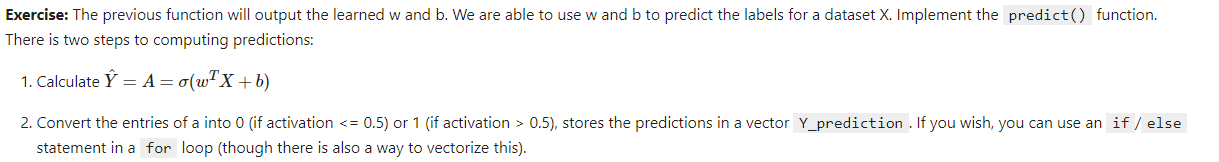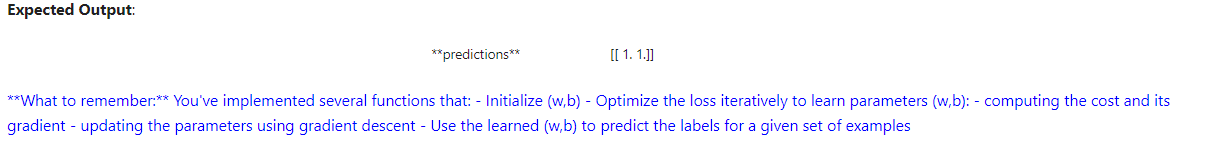

In [18]:
def predict(w, b, X):
    y_pre = sigmoid(np.dot(w.T, X) + b)  # 1, num
    Y_prediction =  []
    for i in range(y_pre.shape[1]):
        if y_pre[0, i] > 0.5:
            Y_prediction.append(1)
        else:
            Y_prediction.append(0)
    return Y_prediction

print ("predictions = " + str(predict(w, b, X)))

predictions = [1, 1]


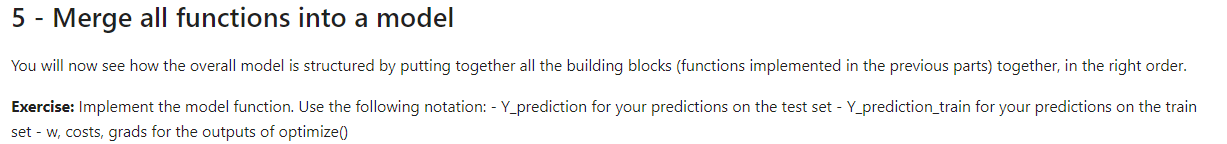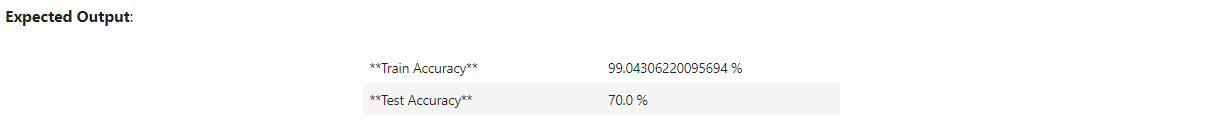

In [20]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    num_py = X_train.shape[0]
    w, b = np.zeros((num_py, 1)), 0
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = params["w"]
    b = params["b"]
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d
    
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)    

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


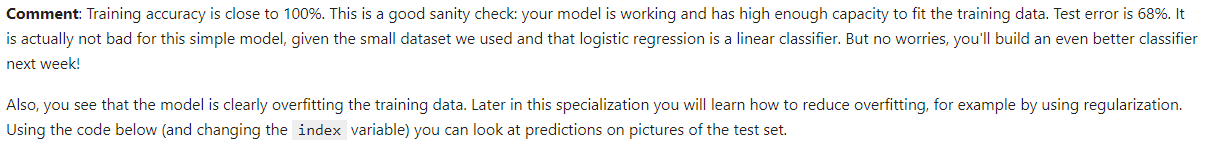


y = 0, you predicted that it is a "cat" picture.


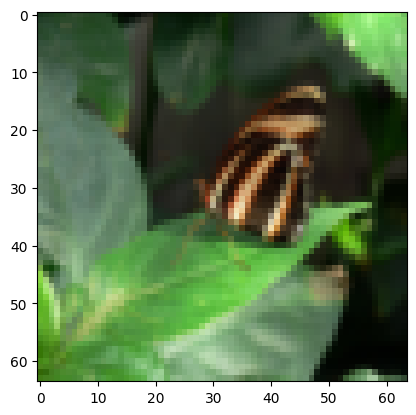

In [23]:
# Example of a picture that was wrongly classified.
index = 5
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][index])].decode("utf-8") +  "\" picture.")

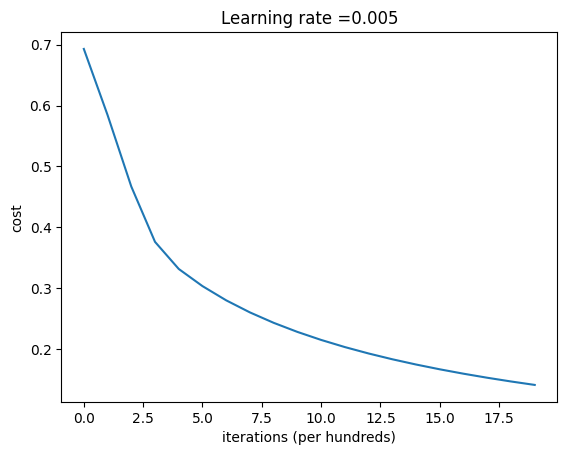

In [24]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

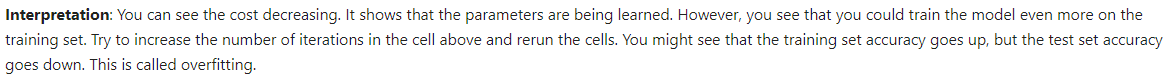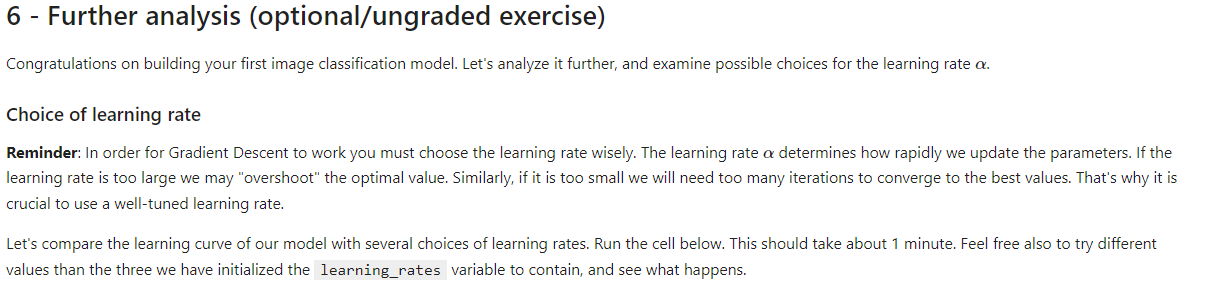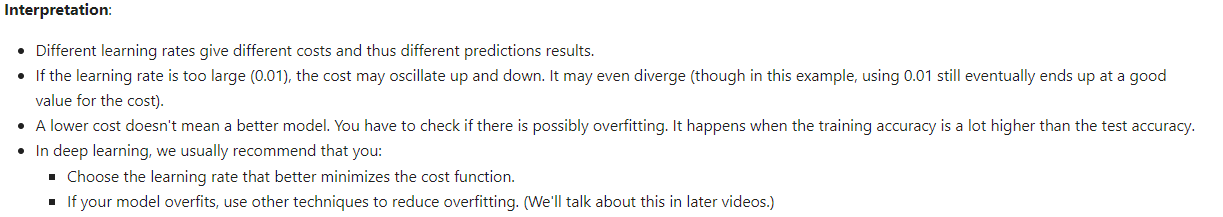

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



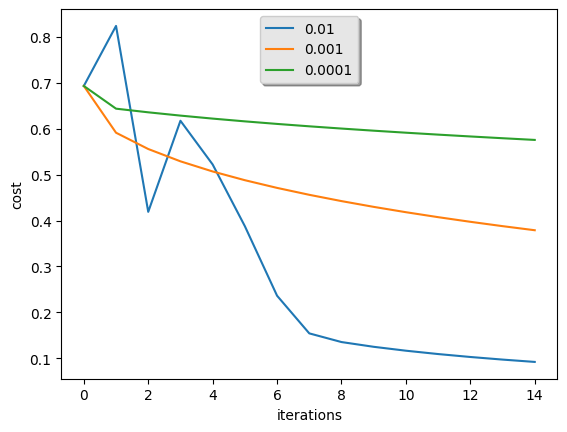

In [25]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

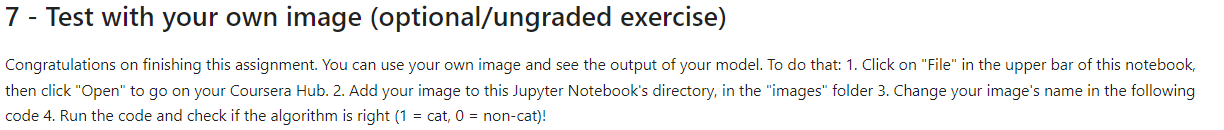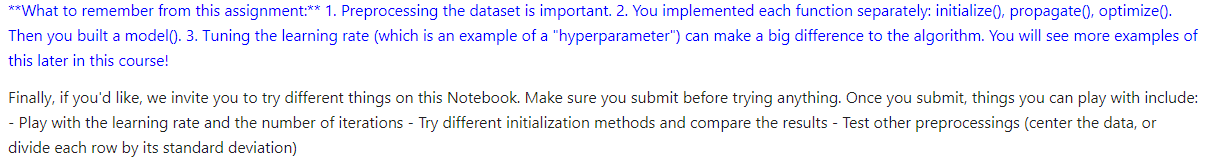

In [ ]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "my_image2.jpg"
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")